In [106]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datadir = '/Users/rzhu/Gladstone Dropbox/Ronghui Zhu/GRNPerturbSeq/3_expts/processed_data/CD4i_final'
experiment_name = 'CD4i_final'

100      15.396393
101       3.091296
102       0.338452
103      48.914228
104       0.000000
           ...    
33981     0.000000
33982     0.000000
33983     0.798092
33984     0.000000
33985    42.729358
Name: baseMean, Length: 11287, dtype: float64

In [94]:
de_summary_stats = pd.read_csv(datadir + f'/DE_results_all_confounders/DE_summary_stats_per_target_corrected.csv', index_col=0)
de_summary_stats_rest = de_summary_stats[de_summary_stats.condition=='Rest'].copy()
de_summary_stats_rest.baseMean = de_summary_stats_rest.baseMean.fillna(0)
de_summary_stats_stim8hr = de_summary_stats[de_summary_stats.condition=='Stim8hr'].copy()
de_summary_stats_stim8hr.baseMean = de_summary_stats_stim8hr.baseMean.fillna(0)
de_summary_stats_stim48hr = de_summary_stats[de_summary_stats.condition=='Stim48hr'].copy()
de_summary_stats_stim48hr.baseMean = de_summary_stats_stim48hr.baseMean.fillna(0)
guide_effect_rest = pd.read_csv(datadir + f'/CD4i_final.guide_effect.Rest.csv', index_col=0)
guide_effect_stim8hr = pd.read_csv(datadir + f'/CD4i_final.guide_effect.Stim8hr.csv', index_col=0)
guide_effect_stim48hr = pd.read_csv(datadir + f'/CD4i_final.guide_effect.Stim48hr.csv', index_col=0)
guide_effect_rest['target_gene'] = guide_effect_rest.index.str[:-2]
guide_effect_stim8hr['target_gene'] = guide_effect_stim8hr.index.str[:-2]
guide_effect_stim48hr['target_gene'] = guide_effect_stim48hr.index.str[:-2]

In [39]:
# Consider significant KD if at least one of the two sgRNA worked
guide_effect_rest = guide_effect_rest[['signif_knockdown', 'target_gene']]
guide_effect_rest = guide_effect_rest.reset_index(drop=True)
guide_effect_rest = guide_effect_rest.drop_duplicates()
duplicate_rows_mask = guide_effect_rest.duplicated(subset=['target_gene'], keep=False)
guide_effect_rest.loc[duplicate_rows_mask, 'signif_knockdown'] = True
guide_effect_rest = guide_effect_rest.drop_duplicates()

# Consider significant KD if at least one of the two sgRNA worked
guide_effect_stim8hr = guide_effect_stim8hr[['signif_knockdown', 'target_gene']]
guide_effect_stim8hr = guide_effect_stim8hr.reset_index(drop=True)
guide_effect_stim8hr = guide_effect_stim8hr.drop_duplicates()
duplicate_rows_mask = guide_effect_stim8hr.duplicated(subset=['target_gene'], keep=False)
guide_effect_stim8hr.loc[duplicate_rows_mask, 'signif_knockdown'] = True
guide_effect_stim8hr = guide_effect_stim8hr.drop_duplicates()

# Consider significant KD if at least one of the two sgRNA worked
guide_effect_stim48hr = guide_effect_stim48hr[['signif_knockdown', 'target_gene']]
guide_effect_stim48hr = guide_effect_stim48hr.reset_index(drop=True)
guide_effect_stim48hr = guide_effect_stim48hr.drop_duplicates()
duplicate_rows_mask = guide_effect_stim48hr.duplicated(subset=['target_gene'], keep=False)
guide_effect_stim48hr.loc[duplicate_rows_mask, 'signif_knockdown'] = True
guide_effect_stim48hr = guide_effect_stim48hr.drop_duplicates()

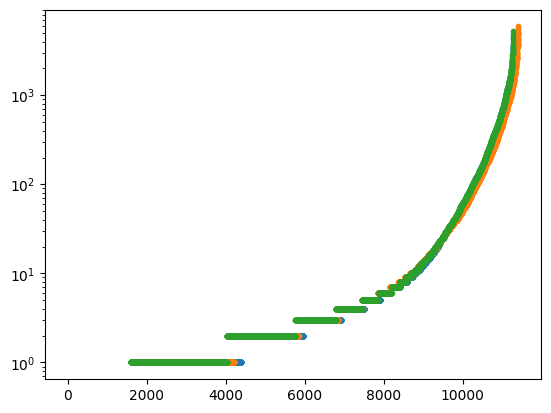

In [45]:
plt.plot(np.sort(de_summary_stats_rest.n_total_de_genes), '.')
plt.plot(np.sort(de_summary_stats_stim8hr.n_total_de_genes), '.')
plt.plot(np.sort(de_summary_stats_stim48hr.n_total_de_genes), '.')
plt.yscale('log')

In [48]:
guide_effect_rest

,signif_knockdown,target_gene
0,False,A1BG
1,False,A2M
2,True,AAAS
3,True,AACS
4,True,AAGAB
...,...,...
12632,False,RPL15
12633,False,PSTK
12634,True,CAPZB
12635,False,SPDL1


In [152]:
nde_thres = 50
# Group 1: high DE, DESeq2 on target, t-test on target
set1 = set(de_summary_stats_rest[de_summary_stats_rest.n_total_de_genes > nde_thres].target_name)
set1 = set1 & set(de_summary_stats_rest[de_summary_stats_rest.ontarget_significant==True].target_name)
set1 = set1 & set(guide_effect_rest[guide_effect_rest.signif_knockdown==True].target_gene)
# Group 2: high DE, DEseq2 no on target, t-test on target
set2 = set(de_summary_stats_rest[de_summary_stats_rest.n_total_de_genes > nde_thres].target_name)
set2 = set2 & set(de_summary_stats_rest[de_summary_stats_rest.ontarget_significant==False].target_name)
set2 = set2 & set(guide_effect_rest[guide_effect_rest.signif_knockdown==True].target_gene)
# Group 3: high DE, DESeq2 no on target, t-test no on target
set3 = set(de_summary_stats_rest[de_summary_stats_rest.n_total_de_genes > nde_thres].target_name)
set3 = set3 & set(de_summary_stats_rest[de_summary_stats_rest.ontarget_significant==False].target_name)
set3 = set3 & set(guide_effect_rest[guide_effect_rest.signif_knockdown==False].target_gene)
# Group 4: low DE, DESeq2 on target, t-test on target
set4 = set(de_summary_stats_rest[de_summary_stats_rest.n_total_de_genes <= nde_thres].target_name)
set4 = set4 & set(de_summary_stats_rest[de_summary_stats_rest.ontarget_significant==True].target_name)
set4 = set4 & set(guide_effect_rest[guide_effect_rest.signif_knockdown==True].target_gene)
# Group 5: low DE, DEseq2 no on target, t-test on target
set5 = set(de_summary_stats_rest[de_summary_stats_rest.n_total_de_genes <= nde_thres].target_name)
set5 = set5 & set(de_summary_stats_rest[de_summary_stats_rest.ontarget_significant==False].target_name)
set5 = set5 & set(guide_effect_rest[guide_effect_rest.signif_knockdown==True].target_gene)
# Group 6: low DE, DESeq2 no on target, t-test no on target
set6 = set(de_summary_stats_rest[de_summary_stats_rest.n_total_de_genes <= nde_thres].target_name)
set6 = set6 & set(de_summary_stats_rest[de_summary_stats_rest.ontarget_significant==False].target_name)
set6 = set6 & set(guide_effect_rest[guide_effect_rest.signif_knockdown==False].target_gene)

In [153]:
len(set1), len(set2), len(set3), len(set4), len(set5), len(set6)

(1080, 186, 143, 5779, 3203, 1717)

Text(0.5, 0, 'Fraction of cells')

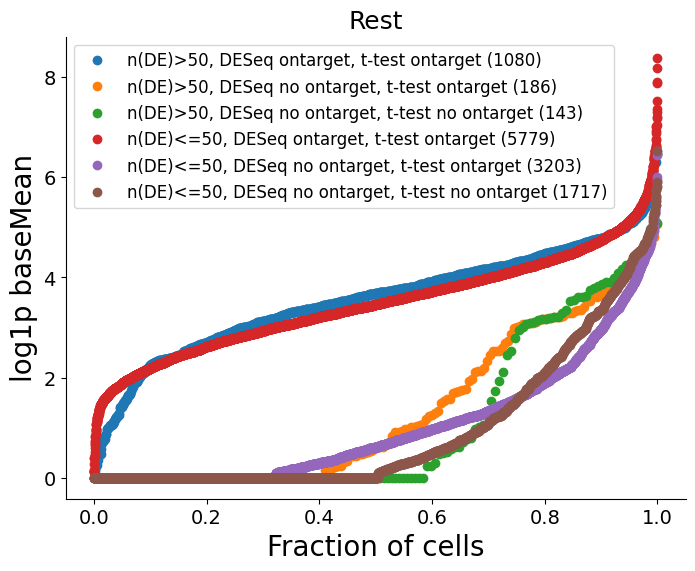

In [154]:
plt.figure(figsize=(8,6))
plt.plot(np.linspace(0,1,len(set1)), np.log1p(np.sort(de_summary_stats_rest[de_summary_stats_rest.target_name.isin(set1)].baseMean)), 'o', label='n(DE)>'+str(nde_thres)+', DESeq ontarget, t-test ontarget ('+str(len(set1))+')')
plt.plot(np.linspace(0,1,len(set2)), np.log1p(np.sort(de_summary_stats_rest[de_summary_stats_rest.target_name.isin(set2)].baseMean)), 'o', label='n(DE)>'+str(nde_thres)+', DESeq no ontarget, t-test ontarget ('+str(len(set2))+')')
plt.plot(np.linspace(0,1,len(set3)), np.log1p(np.sort(de_summary_stats_rest[de_summary_stats_rest.target_name.isin(set3)].baseMean)), 'o', label='n(DE)>'+str(nde_thres)+', DESeq no ontarget, t-test no ontarget ('+str(len(set3))+')')
plt.plot(np.linspace(0,1,len(set4)), np.log1p(np.sort(de_summary_stats_rest[de_summary_stats_rest.target_name.isin(set4)].baseMean)), 'o', label='n(DE)<='+str(nde_thres)+', DESeq ontarget, t-test ontarget ('+str(len(set4))+')')
plt.plot(np.linspace(0,1,len(set5)), np.log1p(np.sort(de_summary_stats_rest[de_summary_stats_rest.target_name.isin(set5)].baseMean)), 'o', label='n(DE)<='+str(nde_thres)+', DESeq no ontarget, t-test ontarget ('+str(len(set5))+')')
plt.plot(np.linspace(0,1,len(set6)), np.log1p(np.sort(de_summary_stats_rest[de_summary_stats_rest.target_name.isin(set6)].baseMean)), 'o', label='n(DE)<='+str(nde_thres)+', DESeq no ontarget, t-test no ontarget ('+str(len(set6))+')')
plt.legend(fontsize=12)
sns.despine()
plt.title('Rest', fontsize=18)
plt.tick_params(labelsize=14)
plt.ylabel('log1p baseMean', fontsize=20)
plt.xlabel('Fraction of cells', fontsize=20)

In [155]:
# Group 1: high DE, DESeq2 on target, t-test on target
set1 = set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.n_total_de_genes > nde_thres].target_name)
set1 = set1 & set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.ontarget_significant==True].target_name)
set1 = set1 & set(guide_effect_stim8hr[guide_effect_stim8hr.signif_knockdown==True].target_gene)
# Group 2: high DE, DEseq2 no on target, t-test on target
set2 = set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.n_total_de_genes > nde_thres].target_name)
set2 = set2 & set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.ontarget_significant==False].target_name)
set2 = set2 & set(guide_effect_stim8hr[guide_effect_stim8hr.signif_knockdown==True].target_gene)
# Group 3: high DE, DESeq2 no on target, t-test no on target
set3 = set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.n_total_de_genes > nde_thres].target_name)
set3 = set3 & set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.ontarget_significant==False].target_name)
set3 = set3 & set(guide_effect_stim8hr[guide_effect_stim8hr.signif_knockdown==False].target_gene)
# Group 4: low DE, DESeq2 on target, t-test on target
set4 = set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.n_total_de_genes <= nde_thres].target_name)
set4 = set4 & set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.ontarget_significant==True].target_name)
set4 = set4 & set(guide_effect_stim8hr[guide_effect_stim8hr.signif_knockdown==True].target_gene)
# Group 5: low DE, DEseq2 no on target, t-test on target
set5 = set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.n_total_de_genes <= nde_thres].target_name)
set5 = set5 & set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.ontarget_significant==False].target_name)
set5 = set5 & set(guide_effect_stim8hr[guide_effect_stim8hr.signif_knockdown==True].target_gene)
# Group 6: low DE, DESeq2 no on target, t-test no on target
set6 = set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.n_total_de_genes <= nde_thres].target_name)
set6 = set6 & set(de_summary_stats_stim8hr[de_summary_stats_stim8hr.ontarget_significant==False].target_name)
set6 = set6 & set(guide_effect_stim8hr[guide_effect_stim8hr.signif_knockdown==False].target_gene)

In [156]:
len(set1), len(set2), len(set3), len(set4), len(set5), len(set6)

(1154, 175, 146, 5993, 3145, 1574)

Text(0.5, 0, 'Fraction of cells')

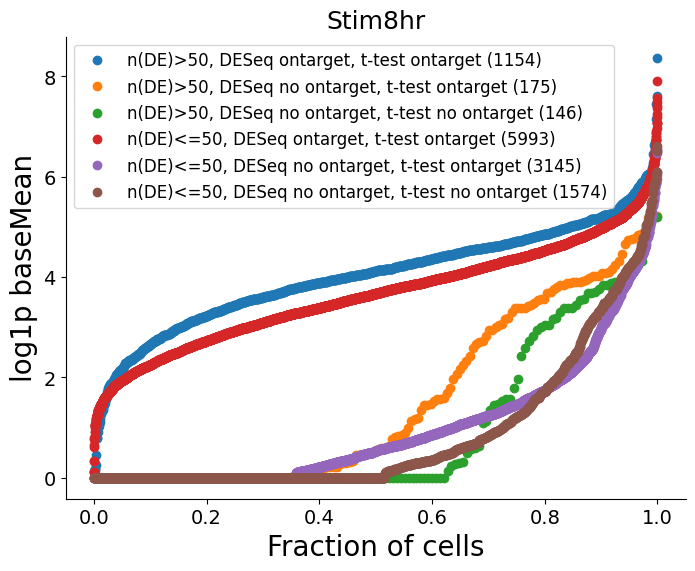

In [157]:
plt.figure(figsize=(8,6))
plt.plot(np.linspace(0,1,len(set1)), np.log1p(np.sort(de_summary_stats_stim8hr[de_summary_stats_stim8hr.target_name.isin(set1)].baseMean)), 'o', label='n(DE)>'+str(nde_thres)+', DESeq ontarget, t-test ontarget ('+str(len(set1))+')')
plt.plot(np.linspace(0,1,len(set2)), np.log1p(np.sort(de_summary_stats_stim8hr[de_summary_stats_stim8hr.target_name.isin(set2)].baseMean)), 'o', label='n(DE)>'+str(nde_thres)+', DESeq no ontarget, t-test ontarget ('+str(len(set2))+')')
plt.plot(np.linspace(0,1,len(set3)), np.log1p(np.sort(de_summary_stats_stim8hr[de_summary_stats_stim8hr.target_name.isin(set3)].baseMean)), 'o', label='n(DE)>'+str(nde_thres)+', DESeq no ontarget, t-test no ontarget ('+str(len(set3))+')')
plt.plot(np.linspace(0,1,len(set4)), np.log1p(np.sort(de_summary_stats_stim8hr[de_summary_stats_stim8hr.target_name.isin(set4)].baseMean)), 'o', label='n(DE)<='+str(nde_thres)+', DESeq ontarget, t-test ontarget ('+str(len(set4))+')')
plt.plot(np.linspace(0,1,len(set5)), np.log1p(np.sort(de_summary_stats_stim8hr[de_summary_stats_stim8hr.target_name.isin(set5)].baseMean)), 'o', label='n(DE)<='+str(nde_thres)+', DESeq no ontarget, t-test ontarget ('+str(len(set5))+')')
plt.plot(np.linspace(0,1,len(set6)), np.log1p(np.sort(de_summary_stats_stim8hr[de_summary_stats_stim8hr.target_name.isin(set6)].baseMean)), 'o', label='n(DE)<='+str(nde_thres)+', DESeq no ontarget, t-test no ontarget ('+str(len(set6))+')')
plt.legend(fontsize=12)
sns.despine()
plt.title('Stim8hr', fontsize=18)
plt.tick_params(labelsize=14)
plt.ylabel('log1p baseMean', fontsize=20)
plt.xlabel('Fraction of cells', fontsize=20)

In [158]:
# Group 1: high DE, DESeq2 on target, t-test on target
set1 = set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.n_total_de_genes > nde_thres].target_name)
set1 = set1 & set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.ontarget_significant==True].target_name)
set1 = set1 & set(guide_effect_stim48hr[guide_effect_stim48hr.signif_knockdown==True].target_gene)
# Group 2: high DE, DEseq2 no on target, t-test on target
set2 = set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.n_total_de_genes > nde_thres].target_name)
set2 = set2 & set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.ontarget_significant==False].target_name)
set2 = set2 & set(guide_effect_stim48hr[guide_effect_stim48hr.signif_knockdown==True].target_gene)
# Group 3: high DE, DESeq2 no on target, t-test no on target
set3 = set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.n_total_de_genes > nde_thres].target_name)
set3 = set3 & set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.ontarget_significant==False].target_name)
set3 = set3 & set(guide_effect_stim48hr[guide_effect_stim48hr.signif_knockdown==False].target_gene)
# Group 4: low DE, DESeq2 on target, t-test on target
set4 = set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.n_total_de_genes <= nde_thres].target_name)
set4 = set4 & set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.ontarget_significant==True].target_name)
set4 = set4 & set(guide_effect_stim48hr[guide_effect_stim48hr.signif_knockdown==True].target_gene)
# Group 5: low DE, DEseq2 no on target, t-test on target
set5 = set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.n_total_de_genes <= nde_thres].target_name)
set5 = set5 & set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.ontarget_significant==False].target_name)
set5 = set5 & set(guide_effect_stim48hr[guide_effect_stim48hr.signif_knockdown==True].target_gene)
# Group 6: low DE, DESeq2 no on target, t-test no on target
set6 = set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.n_total_de_genes <= nde_thres].target_name)
set6 = set6 & set(de_summary_stats_stim48hr[de_summary_stats_stim48hr.ontarget_significant==False].target_name)
set6 = set6 & set(guide_effect_stim48hr[guide_effect_stim48hr.signif_knockdown==False].target_gene)

In [159]:
len(set1), len(set2), len(set3), len(set4), len(set5), len(set6)

(1117, 147, 158, 6069, 3039, 1610)

Text(0.5, 0, 'Fraction of cells')

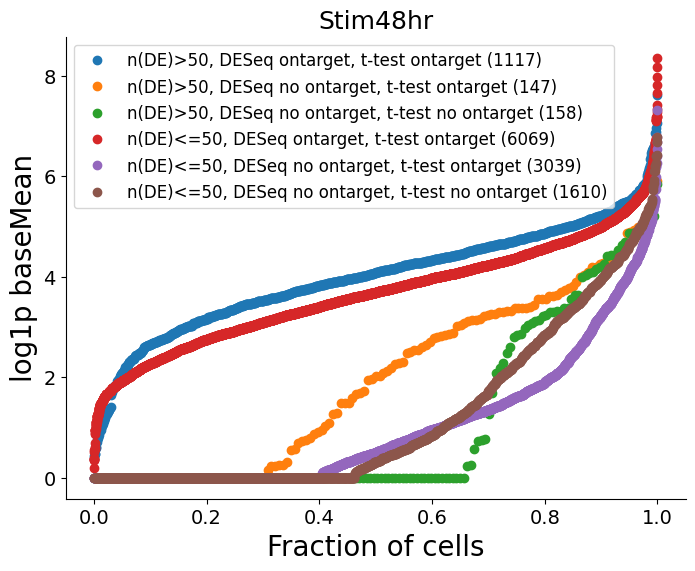

In [160]:
plt.figure(figsize=(8,6))
plt.plot(np.linspace(0,1,len(set1)), np.log1p(np.sort(de_summary_stats_stim48hr[de_summary_stats_stim48hr.target_name.isin(set1)].baseMean)), 'o', label='n(DE)>'+str(nde_thres)+', DESeq ontarget, t-test ontarget ('+str(len(set1))+')')
plt.plot(np.linspace(0,1,len(set2)), np.log1p(np.sort(de_summary_stats_stim48hr[de_summary_stats_stim48hr.target_name.isin(set2)].baseMean)), 'o', label='n(DE)>'+str(nde_thres)+', DESeq no ontarget, t-test ontarget ('+str(len(set2))+')')
plt.plot(np.linspace(0,1,len(set3)), np.log1p(np.sort(de_summary_stats_stim48hr[de_summary_stats_stim48hr.target_name.isin(set3)].baseMean)), 'o', label='n(DE)>'+str(nde_thres)+', DESeq no ontarget, t-test no ontarget ('+str(len(set3))+')')
plt.plot(np.linspace(0,1,len(set4)), np.log1p(np.sort(de_summary_stats_stim48hr[de_summary_stats_stim48hr.target_name.isin(set4)].baseMean)), 'o', label='n(DE)<='+str(nde_thres)+', DESeq ontarget, t-test ontarget ('+str(len(set4))+')')
plt.plot(np.linspace(0,1,len(set5)), np.log1p(np.sort(de_summary_stats_stim48hr[de_summary_stats_stim48hr.target_name.isin(set5)].baseMean)), 'o', label='n(DE)<='+str(nde_thres)+', DESeq no ontarget, t-test ontarget ('+str(len(set5))+')')
plt.plot(np.linspace(0,1,len(set6)), np.log1p(np.sort(de_summary_stats_stim48hr[de_summary_stats_stim48hr.target_name.isin(set6)].baseMean)), 'o', label='n(DE)<='+str(nde_thres)+', DESeq no ontarget, t-test no ontarget ('+str(len(set6))+')')
plt.legend(fontsize=12)
sns.despine()
plt.title('Stim48hr', fontsize=18)
plt.tick_params(labelsize=14)
plt.ylabel('log1p baseMean', fontsize=20)
plt.xlabel('Fraction of cells', fontsize=20)